In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras import regularizers


# Load dataset without unpacking
data = keras.datasets.cifar10.load_data()

# Load dataset 
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Split training set into actual training set (80%) and validation set (20%)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [3]:
print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Print a few label values to see what they look like
print("First 10 training labels:", y_train[:10].ravel())

Training images shape: (40000, 32, 32, 3)
Training labels shape: (40000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
First 10 training labels: [6 2 5 6 3 3 8 3 3 0]


In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_valid = x_valid / 255.0 

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input, BatchNormalization, Activation
from keras.callbacks import EarlyStopping
from keras import regularizers

# Initialize the model
model = Sequential()

# Proper way to define input layer
model.add(Input(shape=(32, 32, 3)))  # Explicit input layer
model.add(Flatten())  # Flatten the input


for _ in range(20):
    model.add(Dense(100, kernel_initializer='he_normal',
                    kernel_regularizer=regularizers.l2(0.0001)))
    model.add(BatchNormalization())
    model.add(Activation('swish'))

# Output Layer: 10 neurons for 10 classes (softmax activation)
model.add(Dense(10, activation='softmax'))

# Show model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 508,210 (1.94 MB)

 Trainable params: 504,210 (1.92 MB)

 Non-trainable params: 4,000 (15.62 KB)

In [6]:
from keras.optimizers import Nadam

# Reduce the initial learning rate
initial_lr = 0.00025  # Reduce from 0.001 to 0.0005


# Update model compilation with lower learning rate
model.compile(
    optimizer=Nadam(learning_rate=initial_lr),  # Use lower learning rate
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Define Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",  # Monitor validation loss
    patience=5,          # Stop if val_loss doesn't improve for 3 epochs
    restore_best_weights=True  # Restore best model weights
)



from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# Define a function to decay the learning rate
def lr_schedule(epoch, lr):
    if epoch < 5:
        return lr  # Keep initial learning rate for first 5 epochs
    return lr * 0.98  # Decay by 2% after every epoch

# Define Learning Rate Scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

class LearningRateLogger(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.lrs = []

    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.learning_rate.numpy()
        self.lrs.append(lr)

lr_logger = LearningRateLogger()


# Train the model with a proper validation set
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(x_valid, y_valid),  # Now using a true validation set
    callbacks=[early_stopping, lr_scheduler, lr_logger]
)

Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.1677 - loss: 2.6772 - val_accuracy: 0.2731 - val_loss: 2.5868 - learning_rate: 2.5000e-04
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.2916 - loss: 2.3390 - val_accuracy: 0.3229 - val_loss: 2.2736 - learning_rate: 2.5000e-04
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.3386 - loss: 2.2327 - val_accuracy: 0.3236 - val_loss: 2.3188 - learning_rate: 2.5000e-04
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.3635 - loss: 2.1436 - val_accuracy: 0.3910 - val_loss: 2.0820 - learning_rate: 2.5000e-04
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.3924 - loss: 2.0653 - val_accuracy: 0.4043 - val_loss: 2.0273 - learning_rate: 2.5000e-04
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.4124 - loss: 2.0101 - val_accuracy: 0.4208 - val_loss: 2.0217 - learning_rate: 2.4500e-04
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 

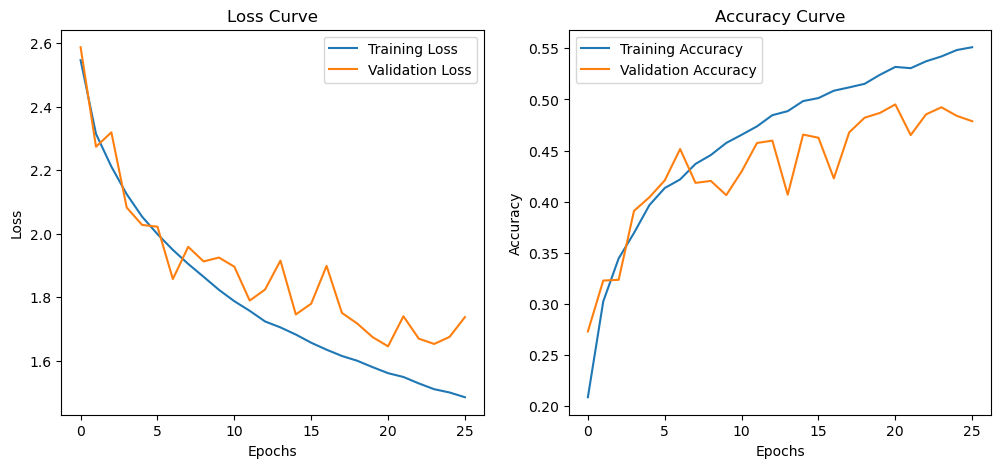

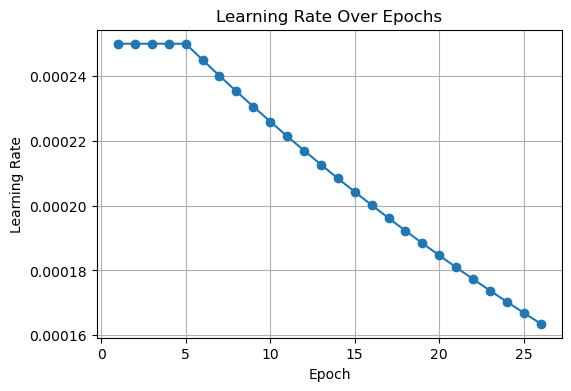

In [7]:
# Extract training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot loss curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

# Plot accuracy curve
plt.subplot(1, 2, 2)
plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.show()



plt.figure(figsize=(6, 4))
plt.plot(range(1, len(lr_logger.lrs) + 1), lr_logger.lrs, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Over Epochs")
plt.grid()
plt.show()

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4965 - loss: 1.6295
Test Accuracy: 0.4956, Test Loss: 1.6359
